# TP n°2 – Analyse Factorielle des Correspondances : AFC: avec R ou Rstudio

## ENQUETE DE LA REGIE FRANCAISE DES TABACS

### Première partie, créer la base de données en `format txt` puis importer cette base de données R

In [29]:
mydata = read.table("data-look-virgule.txt", header = TRUE,sep=",",row.names = 1)
head(mydata)

,ORLY,ALEZ,CORS,DIRE,DUCA,FONT,ICAR,ZODI,PAVI,COCK,ESCA,HOTE
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
viel,1,2,14,38,18,10,9,5,9,4,0,1
nouv,20,9,1,11,10,9,1,1,20,9,7,12
sobr,9,23,1,15,7,11,6,2,7,12,3,17
coca,1,3,15,15,6,5,12,18,4,25,2,2
racé,4,33,7,8,3,6,6,4,5,15,5,3
miev,3,9,1,7,7,5,12,9,6,9,6,13


### Significant dependence test

Chi-square test to evaluate whether there is a significant dependence between row and column categories

In [30]:
chisq <- chisq.test(mydata)
chisq


	Pearson's Chi-squared test

data:  mydata
X-squared = 669.94, df = 110, p-value < 2.2e-16


No nosso caso as variaveis estão estatisticamente associadas, pois p-value << .05

### Statistical significance test

In [31]:
# chi-square statistics results
chi2 <- 669.94
# Degree of freedom
df <- (nrow(mydata)-1)*(ncol(mydata)-1)
# P -value
pval <- pchisq(chi2, df=df, lower.tail = FALSE)
pval

[1] 3.867499e-81

In [ ]:
No nosso caso a associação é bem significante sendo p aproximadamente 0.

### `Deuxième partie :` Mettre en œuvre la méthode AFC à l’aide de R:

In [32]:
library(FactoMineR)
library(factoextra)
mydata.ca = mydata.ca = CA(mydata,ncp=4, graph=FALSE)

### Troisième partie : Analyse des résultats?

#### 1 – Combien d’axes peut-on retenir et pourquoi ?

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.1698450535,29.43385786,29.43386
dim 2,0.1339617724,23.21534650,52.64920
dim 3,0.1018198712,17.64520989,70.29441
dim 4,0.0758603111,13.14646243,83.44088
dim 5,0.0572008706,9.91281325,93.35369
dim 6,0.0210353403,3.64538858,96.99908
dim 7,0.0090835971,1.57417188,98.57325
dim 8,0.0052824869,0.91544597,99.48870
dim 9,0.0026878540,0.46580051,99.95450
dim 10,0.0002625712,0.04550313,100.00000


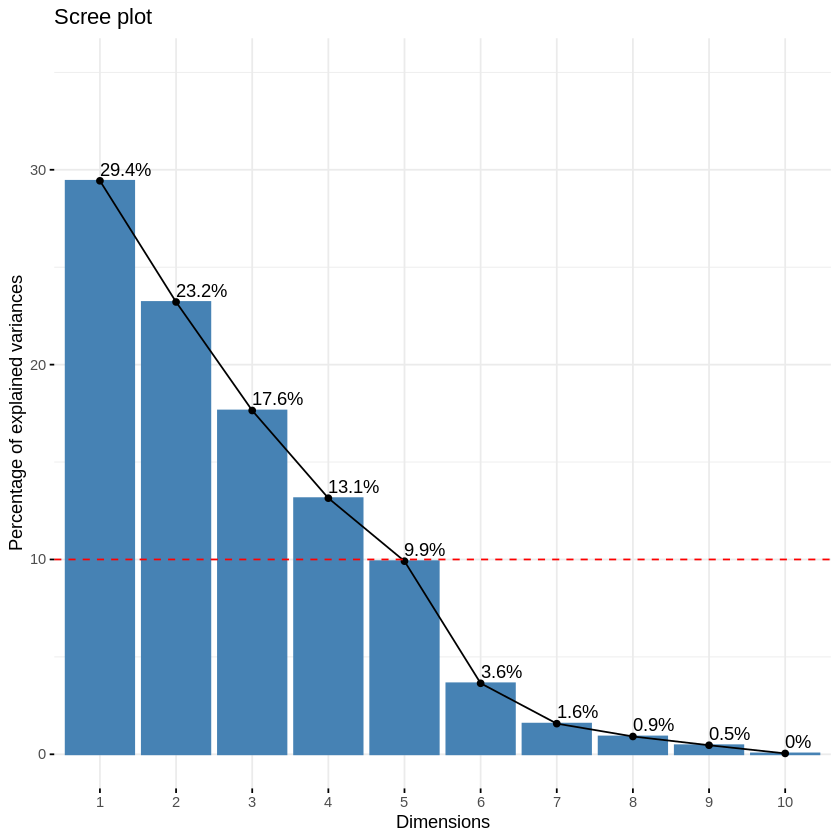

In [33]:
mydata.ca$eig
fviz_screeplot(mydata.ca,addlabels = TRUE, ylim = c(0,35)) + geom_hline(yintercept=10.0, linetype=2, color="red")

A porcetagem media de contribuição de cada coluna nos eixos é de 10%, logo  se alguma contribuição está a baixo disso pode ser retirada, portando somente as dimensoens 1,2,3 e 4 devem ser usadas na solução

#### 2 – Interpréter les quatre premiers axes en fonction des marques

In [34]:
mydata.ca$col

,Dim 1,Dim 2,Dim 3,Dim 4
ORLY,-0.47831947,0.22165433,0.024298167,-0.013194789
ALEZ,-0.35426935,-0.15644651,-0.726248485,-0.344684396
CORS,0.83599692,0.26835346,0.140445828,-0.556258698
DIRE,-0.06921791,-0.55105987,0.418110615,0.003482836
DUCA,0.10461567,-0.32051558,0.246873387,0.053159128
FONT,-0.45932425,-0.19594988,0.188147869,-0.230673125
ICAR,0.29065203,-0.08167104,-0.007082372,0.133457698
ZODI,0.56516935,-0.01017983,-0.111298453,0.462528856
PAVI,-0.21801437,-0.22754233,0.023454541,-0.029725028
COCK,0.28434929,-0.15395608,-0.396083330,0.370078341


### À tabela mostra os relacionamentos entre as marcas:

#### No primeiro eixo e segundo eixo:

- HOTE, ORLY, FONT, ALEZ são bem representadas e possuem uma correlação negativa no primeiro eixo;

- HOTE possui uma grande contribuição tanto no primeiro quanto no segundo eixo, sendo negativa e positiva respectivamente;

- CORS possui o maior cos2 e a maior contribuição logo elá é a marca melhor representada se comparado em conjudo os 2 primeiros eixos, e também  é a com mais contribuição no primeiro eixo, sendo = 0.84;

- ZODI. ICAR e COCK possuem uma contribuição razoavel e positiva no meiro eixo, já no segundo sua contribuição é muito fraca;

- ESCA possui a maior contribuição positiva no eixo 2, porém su contribuição no eixo 1 é fraca;

- DIRE possui tambem uma contribuição fraca no primeiro eixo e possui uma forte contribuição no eixo 2 assim como ESCA, porém sua contribuição no eixo 2 e negativa diferente do DIRE, logo essas marcas deve possuir uma relação oposta.
    
#### No terceiro e quarto eixo:

   - ALEZ é a marca melhor apresentada nesses eixos, ela possui uma contribuição negativa razoavel no quarto eixo e uma contribuição bem forte e negativa no terceiro eixo;
   
   - COCK e ZODI se possuem uma contribuição positiva e razoavel no terceiro eixo;
   
   - CORS e FONT, possuem uma contribuição negativa no quarto eixo, sendo a intensidade, forte e razoavel respetivamente;
   
   - ICAR, ORLY, ESCA, PAVI, são pessimamente representados tanto no eixo 3 quanto no 4;
   
   - HOTE, DUCA, DIRE, possuem uma contribuição positiva e razoavel no eixo 3, porém somente HOTE possui uma contribuição boa no eixo 4.


#### 3 - Interpréter les quatre premiers axes en fonction des attributs

In [35]:
mydata.ca$row

,Dim 1,Dim 2,Dim 3,Dim 4
viel,0.20384148,-0.6869093196,0.591972983,-0.15765680
nouv,-0.47960002,-0.0555121024,0.064451788,0.01047127
sobr,-0.42793503,-0.1580067211,-0.208636236,-0.05820138
coca,0.61609943,-0.2731962130,-0.081241371,0.31419406
racé,-0.11147865,-0.2132565406,-0.736754202,-0.28013809
miev,-0.04444349,-0.0004047644,-0.087175797,0.29079169
dist,-0.60973196,0.0634516763,0.283135564,-0.03553191
vulg,0.76873090,0.4311869642,0.030371418,-0.33681174
hom,0.11744125,0.2363755072,0.009188137,-0.40373313
fem,-0.10081397,0.7442923337,0.224015652,0.23358590


###### À tabela mostra os relacionamentos entre os onze attributs:

###### No primeiro eixo e segundo eixo:

- "vulg" e "dist" é o atributo melhor representando entre os eixos 1, pois o seu cos2 é 0.64 e suas contribuições no priemiro eixo são bem fortes, sendo positiva e negariva respectivamente;

- "hom", "miev", "racé", "petit" não é possivel analisar muito bem esses atributos nas duas primeiras dimesõens, poque possuiem uma contribuição muito fraca nesses eixos;

- "fem" e "viel", possuiem uma boa contribuição são pouco representativos no primeiro eixo porém possuem uma boa contribuição no segundo eixo, sendo o primeiro positivo e o segundo negativo, oque inferece que eles possuem uma correlação negativa;

- "dist", "nouv" e "sobr" possuem uma contribução negativa razoavel no segundo eixo;

- "coca" se relaciona negativamente fraco no segundo eixo, e muito prositivamente forte no primeiro eixo.
    
###### No terceiro e quarto eixo:

- "nouv", "dist" e "sobr" não são bem representados tanto no terceito quanto no quarto eixo;

- "petit", "coca" e "miev" possuem uma contribuição forte e positiva no quarto eixo, porém fraca no terceiro eixo;

- "racé" é o atributo melhor representado no terceiro eixo, com uma contribuição bem fote e o maior cos2, além de possuim uma contribuição negativa razoavel no quarto eixo tambem;

- "vulg" e "hom", possuem uma contribuição forte e negativa no quarto, porém suas contribuições no terceiro eixo são despresiveis;

- "viel" possui uma contribuição forte e positiva no terceiro eixo.

  

### 4 – Projeter les marques et attributs dans le premier plan factoriel et interpréter.

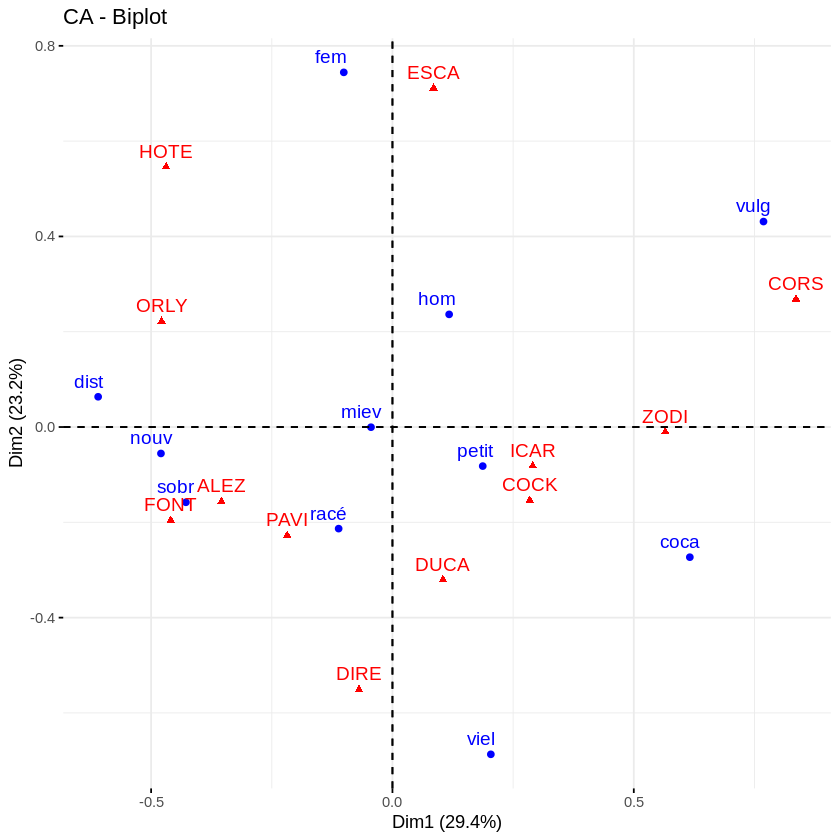

In [36]:
fviz_ca_biplot(mydata.ca)

### É possivel inferir algumas informaçoes com plot das variaveis nos 2 priemiros:

- dá para formar um cluster entre vulg e CORS, logo pessoas que utilizam essa marca tentde a ser mais vulgar;

- outra informação é de quer utiliza ALEZ, FONT tende a ser mais rico e elegant;

- mulheres estam bem relacionadas com a marca ESCA;

- distintos está bem relacionado com ORLY;

- velhors está mais relacionado com DIRE;

- já miev, petit e racé, e as marcas ICAR, COCK e PAVI não são muito bem representadas nessas componentes logo a inferencias com eles tende a estar errada.

### `Quatrième partie :` Mettre en illustratifs Corsaire, Distingué et Vulgaire et interpréter les analyses, les graphiques,....

In [37]:
mydata2.ca = CA(mydata,ncp=4,row.sup = 7:8, col.sup = 3, graph=FALSE )

#### 1 – Combien d’axes peut-on retenir et pourquoi ?

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.182323374,35.0725401,35.07254
dim 2,0.125149948,24.0744040,59.14694
dim 3,0.111743416,21.4954635,80.64241
dim 4,0.061202561,11.7731985,92.41561
dim 5,0.017806987,3.4254317,95.84104
dim 6,0.013157044,2.5309479,98.37199
dim 7,0.005898460,1.1346542,99.50664
dim 8,0.002564715,0.4933601,100.00000


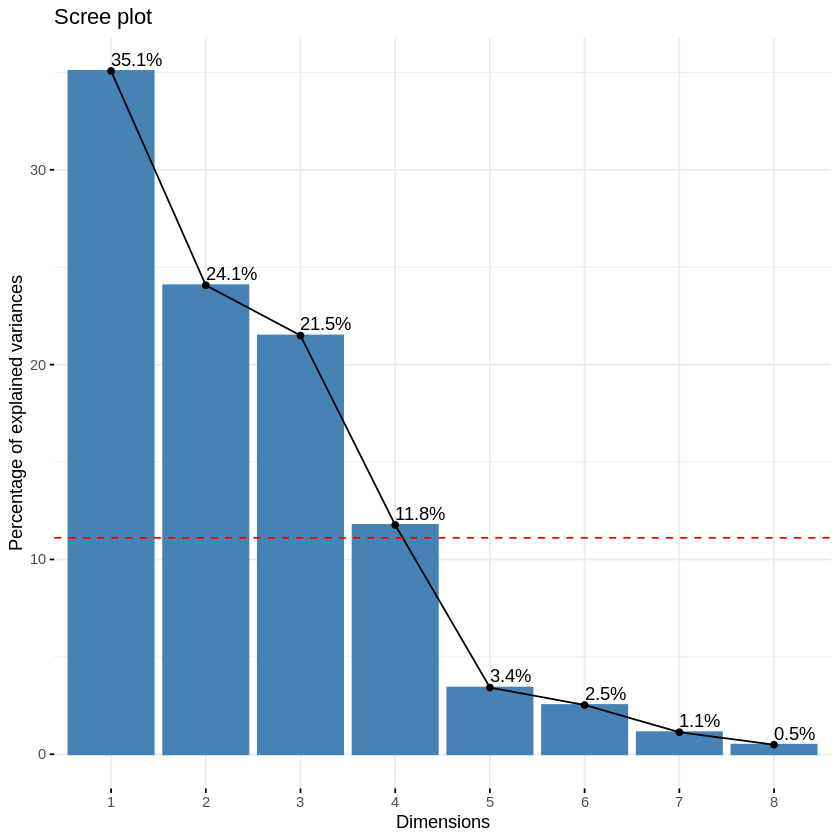

In [38]:
mydata2.ca$eig
fviz_screeplot(mydata2.ca,addlabels = TRUE, ylim = c(0,35)) + geom_hline(yintercept=11.11, linetype=2, color="red") #1/9 average variance

A porcetagem media de contribuição de cada coluna nos eixos é de 11,1%, logo se alguma contribuição está a baixo disso pode ser retirada, portando somente as dimensoens 1,2,3 e 4 devem ser usadas na solução

#### 2 – Interpréter les quatre premiers axes en fonction des marques

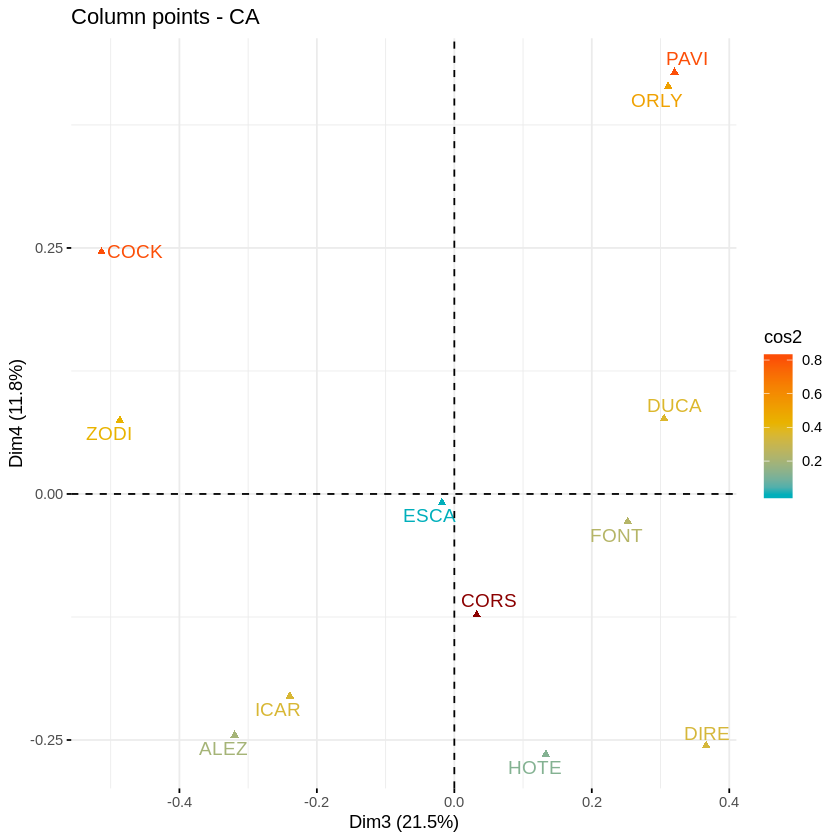

In [40]:
fviz_ca_col(mydata2.ca, col.col = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE, axes=c(3,4))

##### A tabela mostra os relacionamentos entre as marcas:

###### No primeiro eixo e segundo eixo:

- Nos extremos temos as marcas ALEZ, HOTE e ESCA, elas possuem o melhor cos2 grafico, sendo que ALEZ contribuem negativamente forte para o eixo2 e HOTE e ESCA para o eixo 1;

- COCK e PAVI, FONT, possuem os piores cos2 nos 2 eixos, logo suas contriguição nesse plot são as menores;

- DIRE,DUCA,ICAR e ZODI possuem um cos2 razovel, assim possuem um representação não muito ruim nas duas primeiras dimensões, suas contriguições são negativas no primeiro eixo e positiva no segundo;

- ORLY assim como ALEZ possui um contriguição positiva no priemiro eixo e negativa no segundo eixo porem seu cos2 não é muito bom.

    
##### No terceiro e quarto eixo:

- ESCA possuiem a pior representação nesse conjuto de eixos, possui o cos mais baixos dos dois eixos;

- PAVI e ORLY posuem um cos2 muito alto e contribuem forte e positivamente para esses 2 eixos;

- COCK é bem representado tanto pelo eixo 3 quanto pelo 4, porém negativo e positivo respectivamente;

- ALEZ e ICAR não possuem um cos2 muito bom nesse conjunto de eixos, mas sua contribuição pode ser levada em conta ainda, essas marcas contribuem negativamente tanto no eixo 4 quando no 3;

- HOTE e FONT, possuem um cos2 baixo, sendo que o cos2 baixo no eixo 3 e 4 respectivamente, ambas as marcas contribuem negativamente na quarta dimensão e positivamente na terceira;

- DIRE possuiem uma contribuição razoavel para os eixos 3 e 4, sendo essa positivas e negativas respectivamente.

#### 3 - Interpréter les quatre premiers axes en fonction des attributs

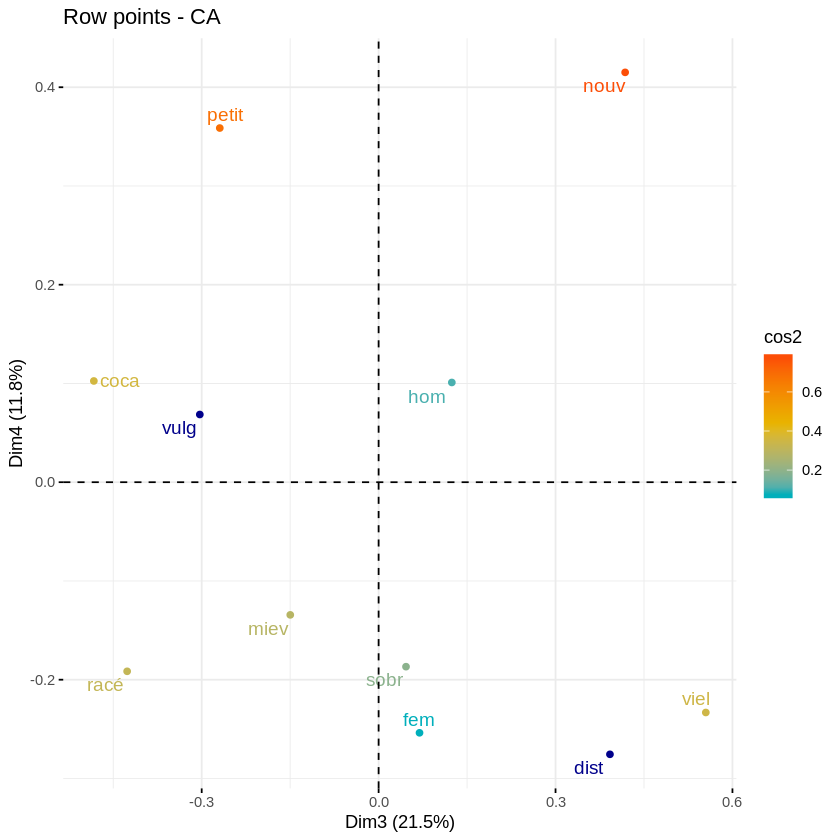

In [43]:
fviz_ca_row(mydata2.ca, col.row = "cos2", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE, axes=c(3,4))

##### A tabela mostra os relacionamentos entre as marcas:

###### No primeiro eixo e segundo eixo:

- "coca" e "viel" possuem um cos2 elevado nesses 2 eixos e contribuem negativamente no eixo 1 e positivamente no eixo 2;

- "petit", "miev", "nouv" e "hom" não são muito bem representado nesse conjunto de eixos, pois seu cos2 não é muito elevado;

- "race" e "sobr" são bem representado no segundo eixo mas possuem um cos2 muito baixo na primeira dimensão;

- "fem" é melhor representado nesse conjuto, pois é o atributo que possui a contribuição mais forte sendo positiva em ambos os eixos;

##### No terceiro e quarto eixo:

- Interessante ver que "fem" possui a contribuição mais forte nos 2 primeiro eixo e já no eixo 3 e 4, sua contribuição é muito pequena com o cos2 nos dois eixos abaixo de 0.2;

- "petit" e "nouv" são muito bem representados nesse plano, pois possuem o cos2 acima de 0.6, sendo que os dois contribuem positivamente para a dimenção 3, e negativam e positivamente para a dimenção 3 respectivamente;

- "hom", "miev", "sobr" e "fem" possuem um contribuição fraca nesse conjuto de eixo;

- "racé" e "viel" possuem uma contribuição consideravel sendo ela negativa no quarto eixo e negariva e positiva no terceiro eixo.

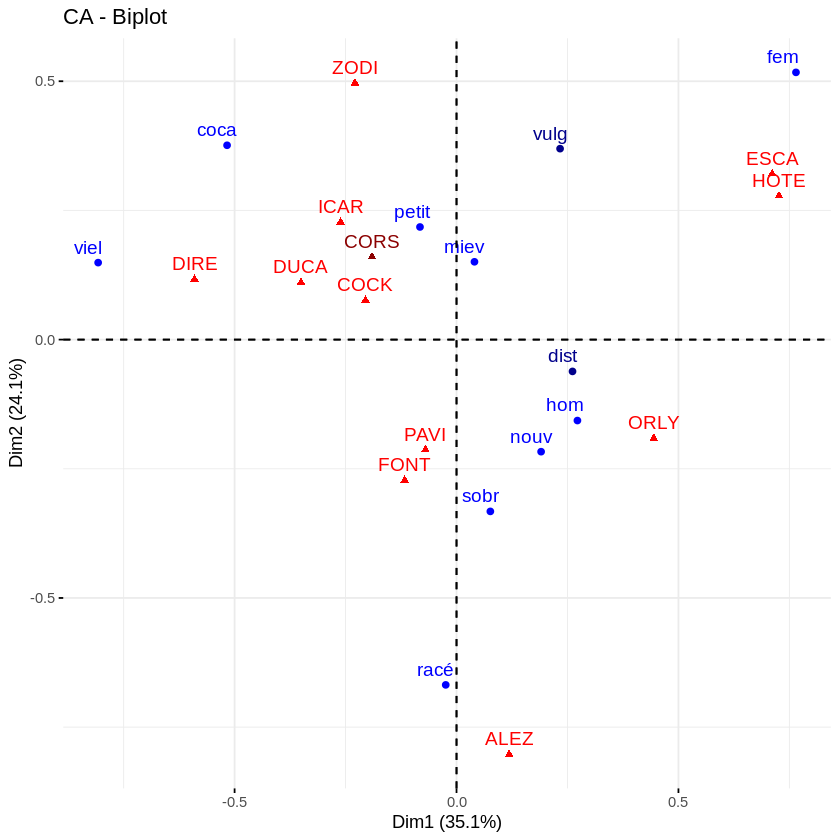

In [46]:
fviz_ca_biplot(mydata2.ca)

Interessante nota que o grafico se clusterizou melhor nas primeiras dimensões, enquanto que com as variaveis suplementares eles se mostrou mais disperso nas dimensões 1 e 2, portanto é possivel retirar de informação do plot:

- ridiculo e velho se formaram um cluster com as marca DIRE,DUCA, ICAR e ZODI no canto superior esquerdo, exatamente no oposto que homem, bonito, rico e elegante, que se encontra no canto direito inferior com marcass como ORLY, PAVI e FONT, oque demonstra que essas marcas e caracteristicas possuem uma correlação negativa;

- já mulheres está altamente relacionado com ESCA e HOTE;

- É possivel também inferiar algumas informações das variaveis inlustrativas, como que CORS se relaciona com velho e ridiculo, já vulgar está um pouco relacionado com ESCA e HOTE.